# Prediction Using Decision Tree Algorithm
### by Anshul Sinha

### Decision Trees: Decision Tree Algorithm randomly selects the complete dataset at a go and creates a tree out of it. That particular tree will be used to predict the values as outputs.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('Iris.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [24]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [25]:
df=df.drop(columns='Id',axis=1)
x=df.drop(columns='Species',axis=1)
y=df['Species']

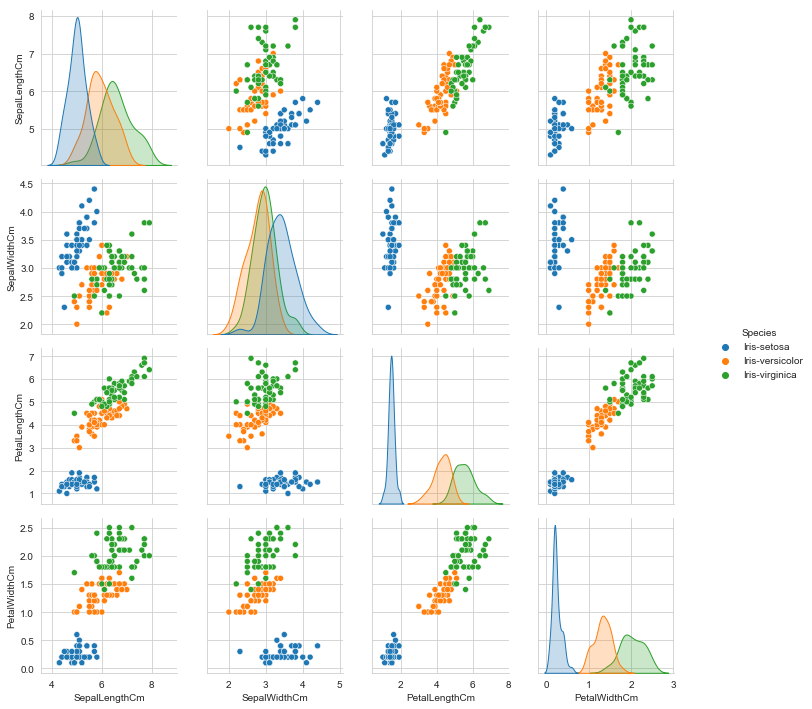

In [26]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species")
plt.show()

# Model Creation

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformers=[('oh',OneHotEncoder(),[5])]
transformed=ColumnTransformer(transformers=transformers,remainder='passthrough')

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [33]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5,random_state=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Evaluation


In [34]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print("The accuracy score is :",(accuracy_score(y_test,y_pred)*100).round(2),"%")
print('The f1 score is ',f1_score(y_test,y_pred,average='weighted'))
print('the confusion matrix for the model')
print(confusion_matrix(y_test,y_pred))

The accuracy score is : 97.37 %
The f1 score is  0.9735365763637706
the confusion matrix for the model
[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]



# Visualizing this as a graph

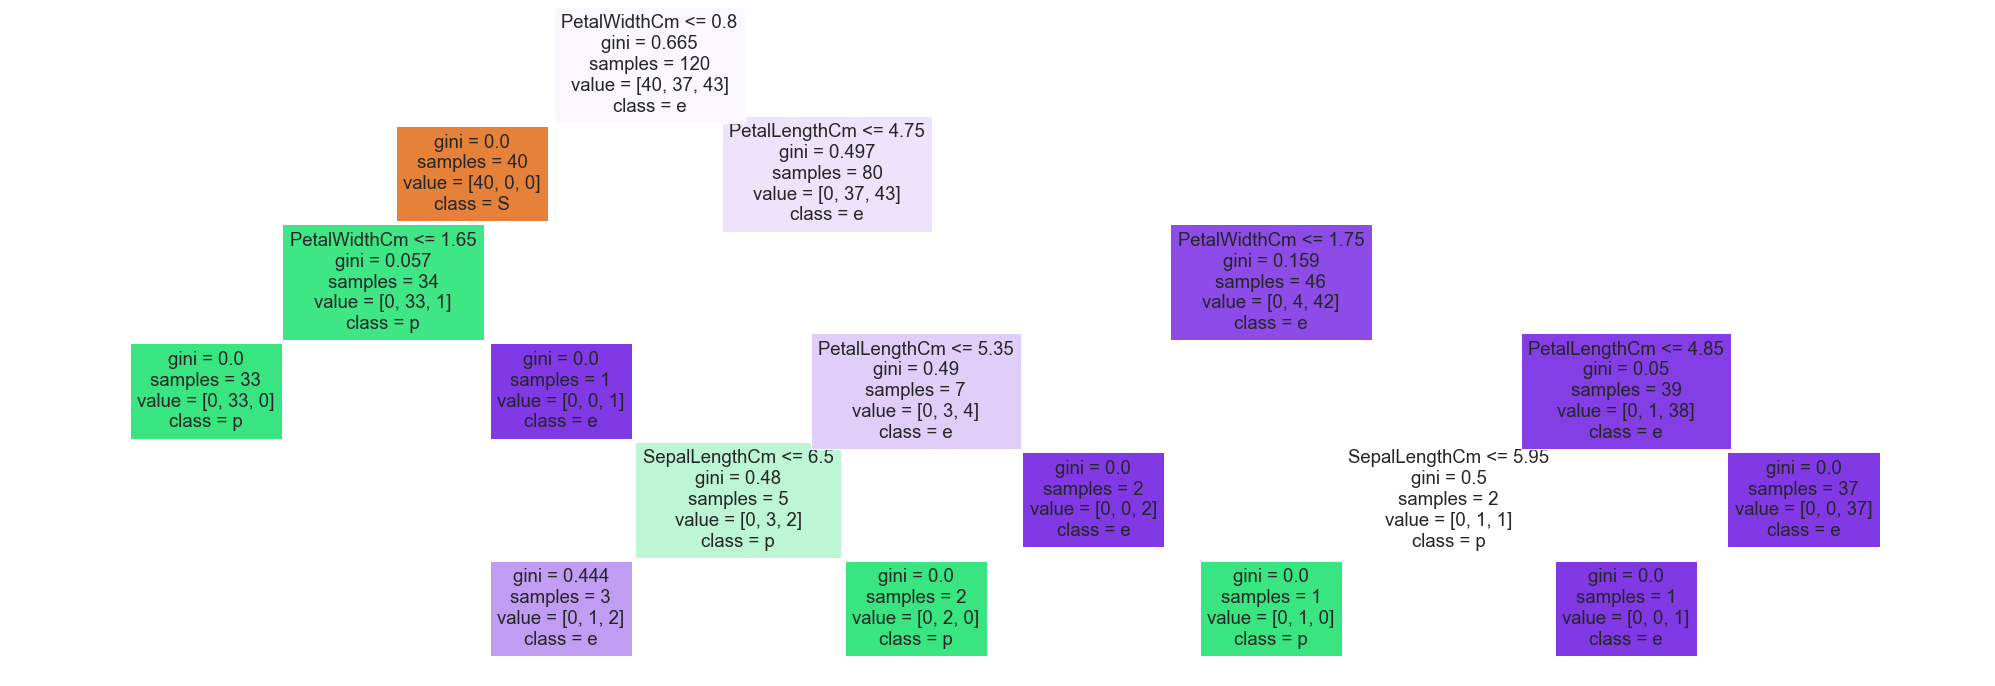

In [31]:
from sklearn import tree
plt.subplots(figsize=(35,12))
tree.plot_tree(model,feature_names=list(df),class_names='Species',filled=True);